In [1]:
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np

def calculate_metrics(pre_dist, post_dist):
    # Calculate KL Divergence
    kld = entropy(pre_dist, post_dist)

    # Calculate Earth Mover's Distance (EMD) using cumulative difference
    emd = np.sum(np.abs(np.cumsum(pre_dist) - np.cumsum(post_dist)))

    # Calculate Information Gain (IG)
    ig_pre = entropy(pre_dist)
    ig_post = entropy(post_dist)
    ig = ig_pre - ig_post

    return {
        'Kullback-Leibler Divergence': kld,
        'Earth Mover\'s Distance': emd,
        'Information Gain': ig
    }

def plot_before_and_after_distribution(syllables, pre_dist, post_dist):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    axes[0].stem(syllables, pre_dist, basefmt=" ")
    axes[0].set_title("Pre Lesion Distribution")
    axes[0].set_xlabel("Syllables")
    axes[0].set_ylabel("Probability")
    axes[1].stem(syllables, post_dist, basefmt=" ")
    axes[1].set_title("Post Lesion Distribution")
    axes[1].set_xlabel("Syllables")
    plt.tight_layout()
    plt.show()

def generate_distributions(plot=False) -> Dict:
    syllables = list("abcdefghijklmnopqrstuvwxyz")
    num_syllables = len(syllables)  # Syllables 'a' to 'z'

    # Pre-lesion distribution
    pre_lesion_prob = np.full(num_syllables, 1 / num_syllables)
    pre_lesion_prob[3] = 0.4  # 'd'
    pre_lesion_prob[14] = 0.4  # 'o'
    remaining_prob_pre = 1 - (pre_lesion_prob[3] + pre_lesion_prob[14])
    other_syllables_prob_pre = remaining_prob_pre / (num_syllables - 2)
    for i in range(num_syllables):
        if i != 3 and i != 14:
            pre_lesion_prob[i] = other_syllables_prob_pre

    # Post-lesion distribution
    post_lesion_prob = np.full(num_syllables, 1 / num_syllables)

    if plot:
        plot_before_and_after_distribution(syllables, pre_lesion_prob, post_lesion_prob)

    return (
        pre_lesion_prob,
        post_lesion_prob,
    )

def generate_bidmodal_distribution(syllables, num_syllables_excited = 2):
    num_syllables = len(syllables)

    # Pre-lesion distribution
    prob = np.full(num_syllables, 1 / num_syllables)

    excited = set()
    while len(excited) < num_syllables_excited:
        random_syllable = np.random.randint(0, num_syllables)
        if random_syllable not in excited:
            excited.add(random_syllable)

        prob[random_syllable] = .8 * (num_syllables_excited / num_syllables)

    remaining_prob_pre = 1 - .8

    other_syllables_prob_pre = remaining_prob_pre / (num_syllables - 2)
    for i in range(num_syllables):
        if i not in excited:
            prob[i] = other_syllables_prob_pre

    return prob


# Example 1: Pre and Post Lesion Distributions

Here we are trying to understand what it would look like if we went from a few syllables being high probability to all syllables being equally probable. Notice the metrics below the charts

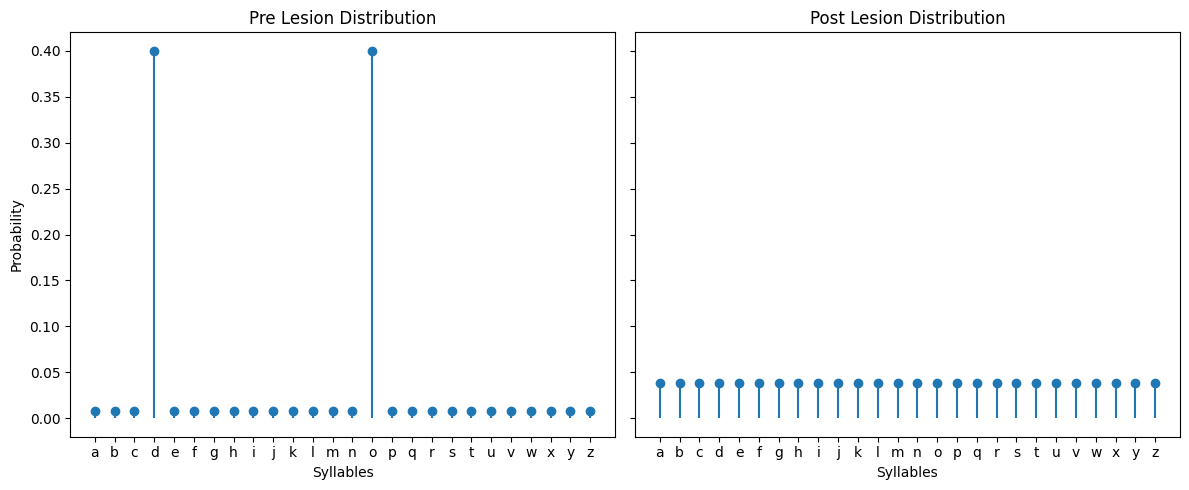

{'Kullback-Leibler Divergence': np.float64(1.5675656039657488),
 "Earth Mover's Distance": np.float64(3.555128205128204),
 'Information Gain': np.float64(-1.5675656039657495)}

In [2]:

pre_lesion_dist, post_lesion_dist = generate_distributions(plot=True)
calculate_metrics(pre_lesion_dist, post_lesion_dist)

# Example Two: Change in syllables but same distribution of probabilities

Here we see what charts and metrics look like if the syllables change but the
distribution of probabilities remains the same.

Notice that although syllables are totally different mutual information is zero!

KLB is about the same as example 1!

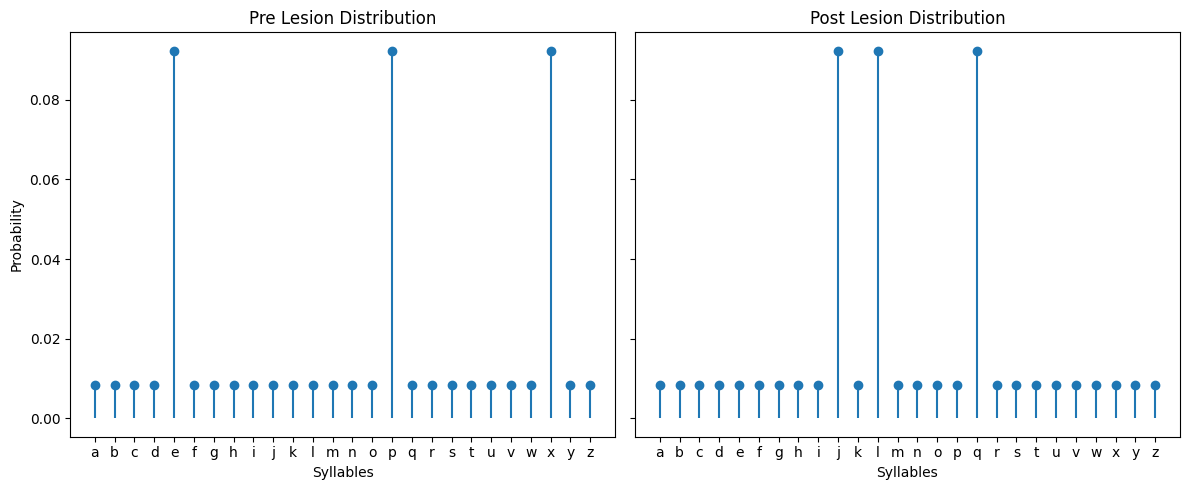

{'Kullback-Leibler Divergence': np.float64(1.2929022287975167),
 "Earth Mover's Distance": np.float64(1.3435897435897433),
 'Information Gain': np.float64(0.0)}

In [ ]:
syllables = list("abcdefghijklmnopqrstuvwxyz")

pre = generate_bidmodal_distribution(syllables, num_syllables_excited=3)
post = generate_bidmodal_distribution(syllables, num_syllables_excited=3)

plot_before_and_after_distribution(syllables, pre, post)
calculate_metrics(pre, post)